In [2]:
import pandas as pd
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv('data/listings.csv', encoding='utf-8')
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,3176,Fabulous Flat in great Location,3718,Britta,Pankow,Prenzlauer Berg Südwest,52.53471,13.41810,Entire home/apt,105.0,63,148,2023-05-25,0.81,1,272,0,First name and Last name: Nicolas Krotz <br/> ...
1,9991,Geourgeous flat - outstanding views,33852,Philipp,Pankow,Prenzlauer Berg Südwest,52.53269,13.41805,Entire home/apt,180.0,6,7,2020-01-04,0.06,1,32,0,03/Z/RA/003410-18
2,14325,Studio Apartment in Prenzlauer Berg,55531,Chris + Oliver,Pankow,Prenzlauer Berg Nordwest,52.54813,13.40366,Entire home/apt,70.0,150,26,2023-11-30,0.15,4,185,1,NaN
3,16644,In the Heart of Berlin - Kreuzberg,64696,Rene,Friedrichshain-Kreuzberg,nördliche Luisenstadt,52.50312,13.43508,Entire home/apt,90.0,93,48,2017-12-14,0.28,2,0,0,NaN
4,17904,Beautiful Kreuzberg studio - 3 months minimum,68997,Matthias,Neukölln,Reuterstraße,52.49419,13.42166,Entire home/apt,25.0,92,299,2022-12-01,1.71,1,1,0,NaN


In [4]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,1.375900e+04,1.375900e+04,13759.000000,13759.000000,8821.000000,13759.000000,13759.000000,10521.000000,13759.000000,13759.000000,13759.000000
mean,3.529798e+17,1.618469e+08,52.509342,13.402723,154.840381,40.905952,38.364779,1.210078,11.022531,125.307799,8.933353
std,4.588343e+17,1.822188e+08,0.033789,0.067338,296.293035,52.400853,86.967422,1.836353,40.753865,129.410364,19.460106
min,3.176000e+03,1.581000e+03,52.340190,13.118150,9.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,1.884756e+07,1.447609e+07,52.490077,13.362765,74.000000,2.000000,1.000000,0.130000,1.000000,0.000000,0.000000
50%,4.234426e+07,6.789678e+07,52.509220,13.411275,114.000000,5.000000,7.000000,0.550000,1.000000,82.000000,1.000000
75%,8.461250e+17,2.785392e+08,52.532147,13.438580,186.000000,92.000000,33.000000,1.700000,4.000000,252.000000,9.000000
max,1.184030e+18,5.846847e+08,52.656110,13.721390,24277.000000,1000.000000,2611.000000,51.320000,281.000000,365.000000,512.000000


# 1.3 Очистка данных

In [5]:
# Основные операции по очистке данных:

# Удаление переменных
# one-hot кодирование
# Удаление пропущенных значений
# Уменьшение размерности

In [6]:
del df['latitude']
del df['longitude']

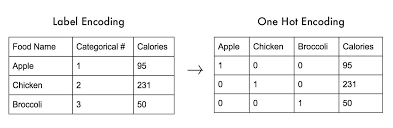

In [7]:
df = pd.get_dummies(df,columns=['neighbourhood_group','neighbourhood'])

df.head()

,id,name,host_id,host_name,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,...,neighbourhood_West 3,neighbourhood_West 4,neighbourhood_West 5,neighbourhood_Westend,neighbourhood_Wiesbadener Straße,neighbourhood_Wilhelmstadt,neighbourhood_Zehlendorf Nord,neighbourhood_Zehlendorf Südwest,neighbourhood_nördliche Luisenstadt,neighbourhood_südliche Luisenstadt
0,3176,Fabulous Flat in great Location,3718,Britta,Entire home/apt,105.0,63,148,2023-05-25,0.81,...,False,False,False,False,False,False,False,False,False,False
1,9991,Geourgeous flat - outstanding views,33852,Philipp,Entire home/apt,180.0,6,7,2020-01-04,0.06,...,False,False,False,False,False,False,False,False,False,False
2,14325,Studio Apartment in Prenzlauer Berg,55531,Chris + Oliver,Entire home/apt,70.0,150,26,2023-11-30,0.15,...,False,False,False,False,False,False,False,False,False,False
3,16644,In the Heart of Berlin - Kreuzberg,64696,Rene,Entire home/apt,90.0,93,48,2017-12-14,0.28,...,False,False,False,False,False,False,False,False,True,False
4,17904,Beautiful Kreuzberg studio - 3 months minimum,68997,Matthias,Entire home/apt,25.0,92,299,2022-12-01,1.71,...,False,False,False,False,False,False,False,False,False,False


In [8]:
# Удаление столбцов с информацией, вытекающий из других столбцов методом исключения
# Например, в случае с Марико интерпретатор Python может сделать вывод о том, что объект из Токио, 
# на основании ложных аргументов city_london и city_mumbai. 
# В статистике это понятие известно как мультиколлинеарность 
# и описывает возможность предсказать переменную на основе значений других переменных.

# Мы можем добавить параметр drop_first=True, который удаляет первый столбец для каждой переменной.

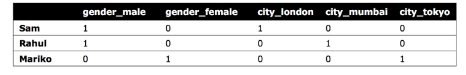 --> 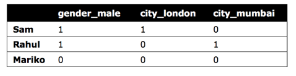

In [9]:
# df = pd.get_dummies(df, columns = ['neighbourhood_group', 'neighbourhood'], drop_first = True)

# 1.4 Работа с пропусками

In [10]:
df.isnull().sum()

id                                     0
name                                   0
host_id                                0
host_name                              9
room_type                              0
                                      ..
neighbourhood_Wilhelmstadt             0
neighbourhood_Zehlendorf  Nord         0
neighbourhood_Zehlendorf  Südwest      0
neighbourhood_nördliche Luisenstadt    0
neighbourhood_südliche Luisenstadt     0
Length: 164, dtype: int64

In [ ]:
# df.dropna(axis=0, how='any', thresh=None, subset=None, inplace=True)

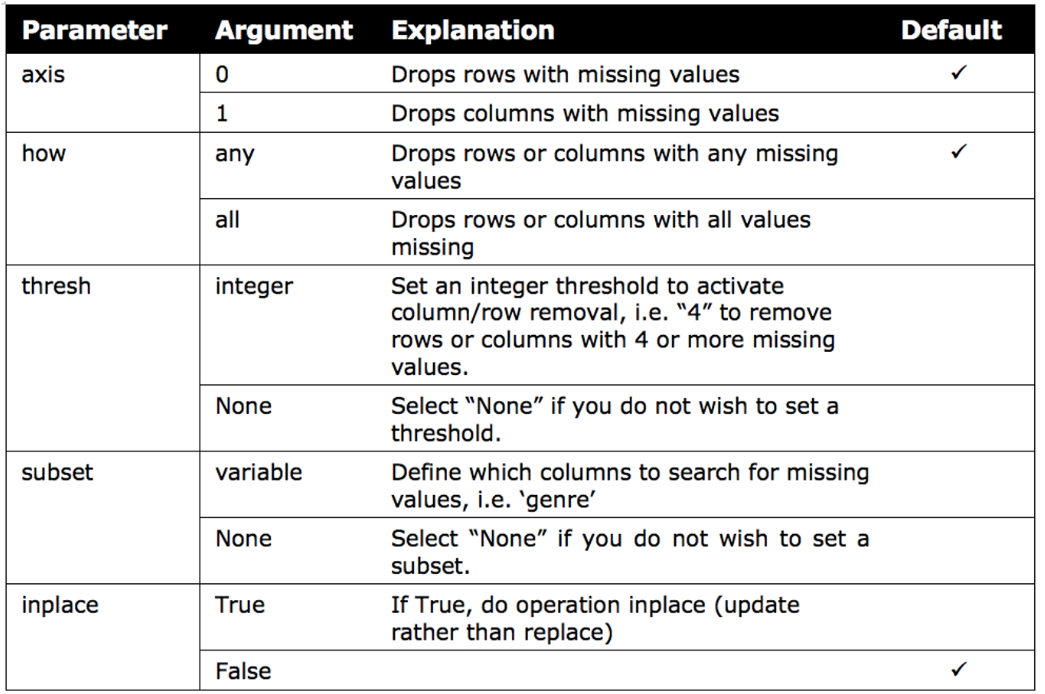

# 1.5 Уменьшение размерности

In [ ]:
# Уменьшение размерности преобразует данные в более низкую размерность. 
# Это позволяет сократить вычислительные ресурсы и визуализировать закономерности в данных.
# Размерность - это количество переменных, описывающих данные.

# 2.1 Разбиение данных

In [11]:
# Обучающий и тестовый набор
# Для выполнения раздельной валидации в Python можно использовать train_test_split от Scikit-learn, 
# который требует первоначального импорта из библиотеки sklearn.model_selection.

from sklearn.model_selection import train_test_split

In [15]:
# Перед использованием этой библиотеки сначала нужно задать значения x и y.

df = pd.read_csv('data/advertising.csv')
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [16]:
X = df[['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage', 'Ad Topic Line', 'Country']]
y = df['Clicked on Ad']

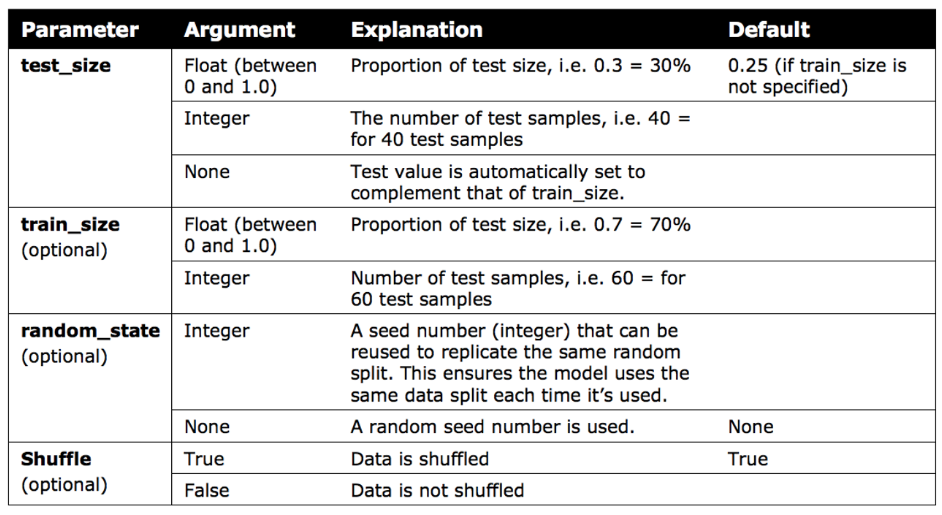

In [18]:
# В этом примере данные для обучения/тестирования разделены 70/30 и перемешаны, 
# а случайное состояние 10 «заложено в закладки» для будущего повторения кода 
# (чтобы «рандомное» разделение  в следующий раз  привело к тем же результатам).

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10, shuffle=True)

In [19]:
# Валидационный набор
# Одним из быстрых решений является разбиение тестовых данных на две части, как показано ниже.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

# Таким образом, тренировочные данные составляют 60 %, а тестовые - 40 %. 
# Затем тестовые данные делятся 50/50, чтобы тестовые данные и набор для проверки были эквивалентны 20 % исходных данных.

X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5)

# 2.2 Создание модели

In [ ]:
# План разработки модели  включает в себя следующие шаги:

# Импорт библиотек
# Импорт набора данных
# Разведывательный анализ данных
# Очистка и обработка данных
# Разбиение данных
# Алгоритм предварительного моделирования (опционально)
# Обучение алгоритма (получение модели)
# Прогнозирование
# Оценка качества предсказания
# Оптимизация

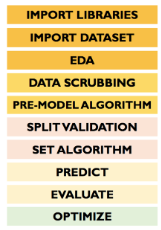

In [ ]:
# 1) Импорт библиотек

# Учитывая, что интерпретатор Python работает сверху вниз по вашему коду, очень важно импортировать библиотеки перед вызовом определенных функций. 
# Например, если вы попытаетесь создать тепловую карту, не импортировав предварительно Seaborn и Matplolib, интерпретатор Python не сможет обработать ваш запрос.

# Библиотеки не обязательно должны быть размещены в верхней части кода.
# Некоторые специалисты по исследованию данных, например, предпочитают импортировать конкретные библиотеки, основанные на алгоритмах, в те разделы, 
# где они используются, при условии, что импорт производится перед ссылками кода на эту библиотеку.

In [ ]:
# 2) Импорт набора данных

# Наборы данных обычно импортируются из архивов вашей организации или публичных хранилищ, таких как Kaggle. 
# Хотя Kaggle предлагает фантастическое количество наборов данных, стоит упомянуть, 
# что Scikit-learn предлагает несколько небольших встроенных наборов данных, которые не требуют загрузки извне.

Краткая информация о наборах данных Scikit-learn <br> <br>
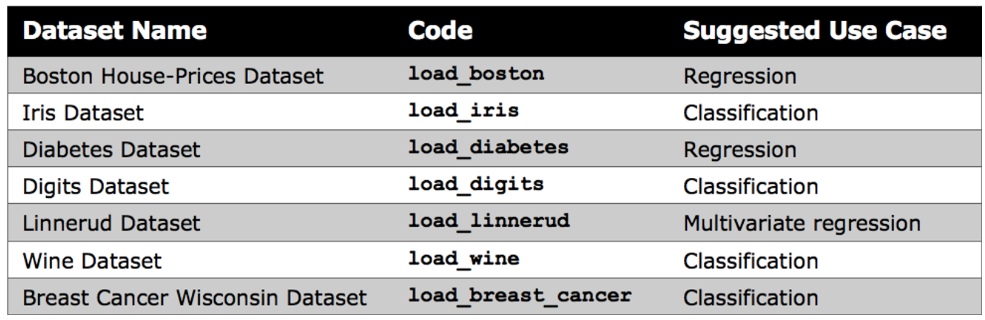

In [ ]:
# Создание блобов
# Используя Scikit-learn, можно самостоятельно сгенерировать случайный набор данных с помощью функции make blobs.

# from sklearn.datasets import make_blobs
# data = make_blobs(n_samples=200, n_features=2, centers=4, cluster_std=1.8, random_state=101)

In [ ]:
# 3) Исследовательский анализ данных

# Третий этап, EDA, дает возможность ознакомиться с вашими данными, включая распределение и состояние пропущенных значений. 
# Исследовательский анализ данных также определяет следующий этап очистки данных и выбор алгоритма.

# Кроме того, EDA может использоваться и в других разделах кода, когда вы проверяете размер и структуру набора данных 
# и интегрируете эту обратную связь в прямую оптимизацию модели.

In [ ]:
# 4) Очистка данных

# Этап очистки данных обычно отнимает больше всего времени и сил при разработке модели прогнозирования. 
# Как и при уходе за хорошей парой туфель, важно уделять внимание качеству данных.

In [ ]:
# 5) Алгоритм предварительного моделирования (опционально)

# В качестве дополнения к процессу очистки данных при подготовке к анализу больших и сложных наборов данных иногда используются методы 
# неконтролируемого обучения, включая кластерный анализ и алгоритмы уменьшения размерности.

# Однако этот шаг необязателен и применяется не для всех моделей, 
# особенно редко для небольших наборов данных с малым количеством измерений (признаков) или строк.

In [ ]:
# 6) Разделение данных

# Разделение данных используется для разделения данных на обучающие и тестовые. 
# На этом этапе также полезно рандомизировать данные с помощью функции shuffle и задать случайное состояние, 
# если вы хотите воспроизвести результаты модели в будущем.

In [ ]:
# 7) Обучение алгоритма

# Алгоритмы - это центральный элемент любой модели машинного обучения, и выбирать их нужно тщательно.

# Алгоритм - это математически обоснованная последовательность шагов, которая реагирует на изменяющиеся закономерности, 
# чтобы сгенерировать решение или выход. Выполняя ряд шагов, определенных алгоритмом, модель реагирует на входные переменные, 
# чтобы интерпретировать закономерности, производить расчеты и принимать решения.

# Поскольку входные данные являются переменными, алгоритмы могут выдавать различные результаты в зависимости от входных данных. 
# Алгоритмы также могут быть изменчивыми, поскольку они имеют гиперпараметры, 
# которые можно корректировать для создания более адаптированной модели.

# Таким образом, алгоритмы представляют собой скорее подвижную структуру, чем конкретное уравнение, 
# и настраиваются в зависимости от целевого результата и характеристик входных данных.

# Для контекста не следует путать алгоритм с моделью. Модель - это конечное состояние алгоритма; 
# после консолидации гиперпараметров в ответ на шаблоны, полученные из данных, 
# и после завершения комбинации методов очистки данных, проверки на разделение и оценки. 
# Ниже приведен список популярных алгоритмов, используемых в машинном обучении, и их общие характеристики.

Краткая информация о наборах данных Scikit-learn <br> <br>
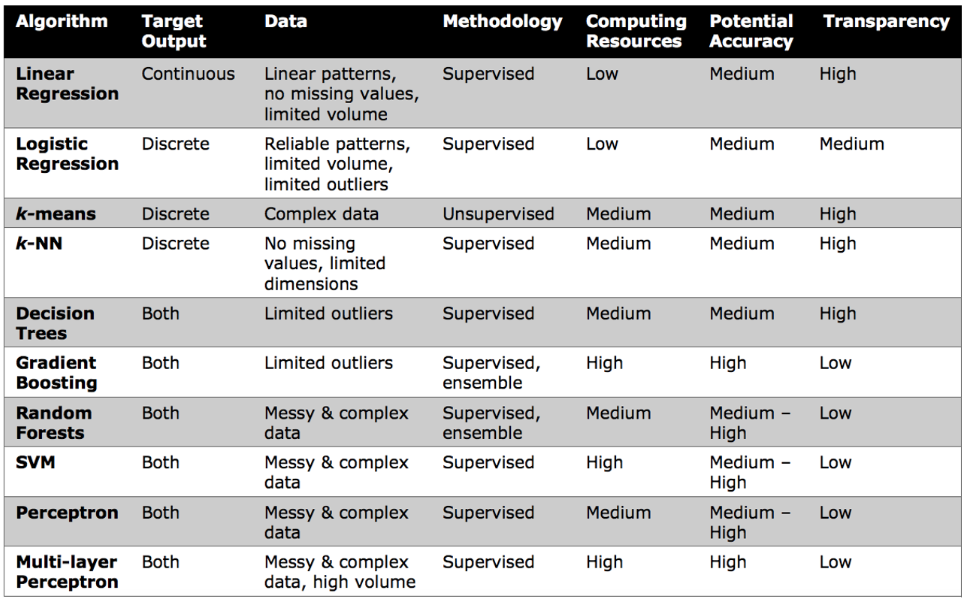

In [ ]:
# 8) Предсказание

# После создания первоначальной модели с использованием паттернов, извлеченных из обучающих данных, 
# функция predict вызывается на тестовых данных для проверки модели.

# Функция predict генерирует числовое значение, например цену, или числовой показатель корреляции в задачах регрессии. 
# При классификации функция predict генерирует дискретные классы, такие как категория фильмов или классификация спам/не спам.

In [ ]:
# 9) Оценка качества предсказания

# Следующий шаг в процессе разработки модели - оценка результатов. 
# Метод оценки зависит от сферы применения вашей модели. 
# В частности, это зависит от того, будет ли это классификационная или регрессионная модель. 
# При классификации распространенными методами оценки являются матрица путаницы, отчет о классификации и оценка точности.

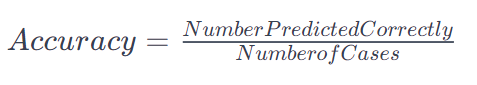

In [ ]:
# Accuracy

# Это простая метрика, измеряющая, сколько случаев модель классифицировала правильно, 
# деленная на полное количество случаев. Если все предсказания верны, показатель accuracy равен 1.0, 
# а если все случаи предсказаны неверно - 0.

# Хотя accuracy сама по себе обычно является надежной метрикой производительности, 
# она может скрывать чрезмерное количество ложных или отрицательных результатов. 
# Это не проблема, если количество ложноположительных и ложноотрицательных результатов сбалансировано, 
# но это также не то, что можно определить с помощью одной лишь точности. 
# Поэтому мы обратились к двум следующим методам оценки.

In [ ]:
# Матрица путаницы

# Матрица запутанности (также известная как матрица ошибок) - это простая таблица, 
# которая обобщает результаты работы модели, включая точное количество ложноположительных и ложноотрицательных результатов.

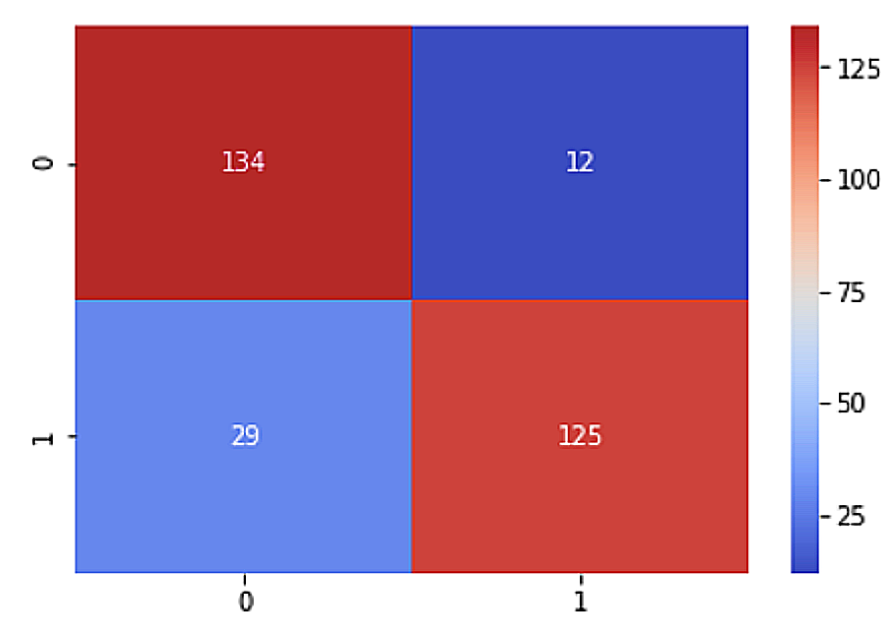

In [ ]:
# Как видно в левом верхнем поле, модель в этом примере правильно предсказала 134 точки данных как «0» и 125 как «1».
#  Модель также неправильно предсказала 12 точек данных как «1» и 29 случаев как «0». 
# Это означает, что 12 точек данных, которые были предсказаны как «1» (ложноположительные), 
# должны были быть классифицированы как «0», а 29 точек данных, предсказанных как «0» (ложноотрицательные), 
# должны были быть классифицированы как «1».

# Используя матрицу путаницы, вы можете проанализировать соотношение ложноположительных и ложноотрицательных результатов 
# и рассчитать итоговую точность предсказаний, разделив общее количество ложноположительных (12) и ложноотрицательных (29) результатов 
# на общее количество точек данных, которое в данном случае равно 300.

In [ ]:
# Отчет о классификации

# Еще один популярный метод оценки - отчет о классификации, который генерирует три метрики оценки.

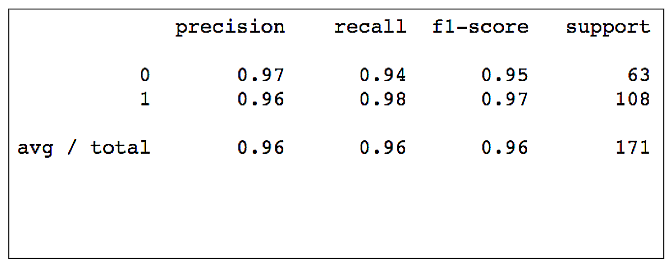

In [ ]:
# Precision

# Precision - это отношение правильно предсказанных истинно положительных случаев к общему числу предсказанных положительных случаев. 
# Высокий показатель точности означает низкое количество ложных срабатываний.

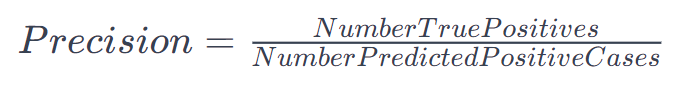

In [ ]:
# Эта метрика отвечает на вопрос о том, насколько точно модель предсказывает положительный результат. 
# Другими словами, это способность модели не выдать отрицательный случай за положительный, что важно, 
# например, в случае с тестами на наркотики.

In [ ]:
# Recall

# Показатель recall модели аналогичен показателю precision, 
# но в данном случае представляет собой отношение правильно предсказанных истинных положительных результатов 
# к реальным положительным случаям. Другими словами, отзыв отвечает на вопрос о том, 
# сколько положительных результатов было правильно классифицировано как положительные. 
# Это можно понимать как способность модели идентифицировать все положительные случаи. 
# Обратите внимание, что числитель (вверху) одинаков для precision и recall, а знаменатели (внизу) различны.

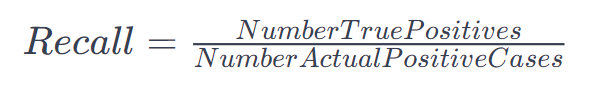

In [ ]:
# F1-score
# F1-score - это средневзвешенное значение precision и recall. 
# Обычно он используется в качестве метрики для сравнения моделей между собой, а не для оценки точности отдельной модели.

# Кроме того, показатель f1-score обычно ниже, чем показатель точности, из-за способа расчета recall и precision.

In [ ]:
# Двумя наиболее распространенными оценочными показателями задач регрессии (прогнозирование непрерывных переменных) 
# являются MAE и RMSE.

In [ ]:
# MAE (mean absolute error) измеряет средние ошибки в наборе прогнозов, 
# то есть насколько далеко линия регрессии находится от реальных точек данных. 

# RMSE (root mean square error), с другой стороны, измеряет стандартное отклонение ошибок прогнозирования, 
# которое показывает, насколько сконцентрированы или разбросаны ошибки прогнозирования от оптимального соответствия.

# Учитывая, что перед усреднением ошибки возводятся в квадрат, RMSE гораздо более чувствителен к большим ошибкам, чем MAE. 
# С другой стороны, RMSE не так легко интерпретировать, как MAE, поскольку он не описывает среднюю ошибку предсказаний модели. 
# Поэтому RMSE чаще используется в качестве механизма обратной связи для штрафования плохих предсказаний, 
# чем для исследования средней ошибки для каждого предсказания.

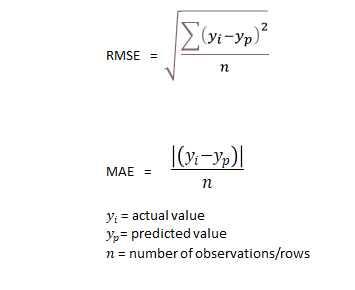

In [ ]:
# 10) Оптимизация

# Последний шаг - оптимизация модели. 
# Оптимизация модели может быть выполнена вручную с помощью системы проб и ошибок 
# или с помощью автоматизации с использованием поиска по сетке (или кросс-валидации).

# Этот метод позволяет опробовать ряд конфигураций для каждого гиперпараметра 
# и методично протестировать каждый из возможных гиперпараметров. 
# Затем происходит автоматизированный процесс голосования для определения оптимальной модели.

# Поскольку модель должна исследовать каждую возможную комбинацию гиперпараметров, 
# поиск по сетке может занять много времени (в соответствии с количеством комбинаций, 
# которые вы задаете для каждого гиперпараметра).

# 2.3 Простая линейная регрессия

In [ ]:
# Линейная регрессия — это одна из простейших моделей машинного обучения, 
# используемая для предсказания значения целевой переменной на основе одной
# или нескольких независимых переменных (признаков).

In [ ]:
# цена дома = A∗площадь + B∗количество комнат +...+ Y∗удаленность от метро + Z

# где Z (a0) - свободный член (интерсепт), который представляет собой значение целевой переменной при нулевых значениях всех признаков.

In [ ]:
# Графически линейная регрессия для одномерного случая выглядит как прямая линия, которая "лучшим образом" проходит через точки данных. 
# Мы пытаемся найти такие коэффициенты β0​ и β1, 
# которые минимизируют расхождения между предсказанными значениями y^ и реальными значениями y.